<a href="https://colab.research.google.com/github/roboGOD/iisc-dsp-stock-price-prediction/blob/main/src/IISc_DSP_Project_Apple_Stock_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Collection

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import yfinance as yf

import yfinance as yf
import pandas as pd

class StockDataFetcher:
    def __init__(self, ticker, start_date, end_date,market=".NS"):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.data = None
        self.market = market

    def merge_dataframes_on_date(self,*dfs):
        # Filter out empty DataFrames
        non_empty_dfs = [df for df in dfs if not df.empty]

        # If there are no non-empty DataFrames, return an empty DataFrame
        if not non_empty_dfs:
            return pd.DataFrame()

        # Perform a sequential merge on 'Date' column
        merged_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='left'), non_empty_dfs)

        return merged_df


    def transform_dataframe(self, df):
        """
        Transforms the input DataFrame to have dates as rows and other information as columns.
        Converts column names to lowercase with underscores instead of spaces.
        Handles NaN values appropriately.
        """
        df = df.T
        df = df.reset_index()
        df.rename(columns={'index': 'Date'}, inplace=True)
        # df['Date'] = price_data['Date'].dt.date
        # print(df.dtypes)
        new_columns = []
        for col in df.columns:
            new_col = col.lower().replace(" ", "_")
            new_columns.append(new_col)
        df.columns = new_columns

        for col in df.columns:
          if pd.api.types.is_numeric_dtype(df[col]):
            if pd.api.types.is_float_dtype(df[col]):
              df[col] = df[col].round(2)
            elif pd.api.types.is_integer_dtype(df[col]):
              df[col] = df[col].astype(float)

        # Convert 'date' column to datetime if it exists
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])

        return df

    def process_price_data(self, price_data):
        price_data = price_data.reset_index()
        price_data.columns = price_data.columns.get_level_values(0)
        price_data['Ticker'] = self.ticker
        if 'Date' in price_data.columns:
            price_data['Date'] = pd.to_datetime(price_data['Date'].dt.date)
        new_columns = []
        for col in price_data.columns:
            new_col = col.lower().replace(" ", "_")
            new_columns.append(new_col)
        price_data.columns = new_columns
        return price_data

    def fetch_price_data(self):
        try:
            self.data = yf.download(self.ticker + self.market, start=self.start_date, end=self.end_date) # Added .NS for Indian stocks
            if self.data.empty:
                print(f"No data found for {self.ticker} between {self.start_date} and {self.end_date}")
            return self.data
        except Exception as e:
            print(f"Error fetching price data for {self.ticker}: {e}")
            return None

    def fetch_financial_data(self):
        if self.data is None:
            print("Fetch price data first using fetch_price_data()")
            return None

        try:
          ticker_info = yf.Ticker(self.ticker + self.market) # Added .NS for Indian stocks
          financials = self.transform_dataframe(ticker_info.financials.add_prefix("annual_"))
          balance_sheet = self.transform_dataframe(ticker_info.balance_sheet.add_prefix("annual_"))
          cashflow = self.transform_dataframe(ticker_info.cashflow.add_prefix("annual_"))
          # Add more financial data as needed

          return financials, balance_sheet, cashflow
        except Exception as e:
            print(f"Error fetching financial data for {self.ticker}: {e}")
            # Return empty DataFrames to avoid unpacking None
            return pd.DataFrame(), pd.DataFrame(), pd.DataFrame() # Return empty dataframes instead of None


    def fetch_quarterly_financial_data(self):
        if self.data is None:
            print("Fetch price data first using fetch_price_data()")
            return None

        try:
          ticker_info = yf.Ticker(self.ticker + self.market) # Added .NS for Indian stocks
          quarterly_financials = self.transform_dataframe(ticker_info.quarterly_financials)
          quarterly_balance_sheet = self.transform_dataframe(ticker_info.quarterly_balance_sheet)
          quarterly_cashflow = self.transform_dataframe(ticker_info.quarterly_cashflow)
          # Add more quarterly financial data as needed

          return quarterly_financials, quarterly_balance_sheet, quarterly_cashflow
        except Exception as e:
            print(f"Error fetching quarterly financial data for {self.ticker}: {e}")
            return None



In [ ]:
ticker = "AAPL"
start_date = "2010-04-01"
end_date = "2020-12-31"

fetcher = StockDataFetcher(ticker, start_date, end_date, "")

In [ ]:
price_data = fetcher.process_price_data(fetcher.fetch_price_data())
price_data.head()

[*********************100%***********************]  1 of 1 completed


,date,adj_close,close,high,low,open,volume,ticker
0,2010-04-01,7.108994,8.427500,8.526071,8.312500,8.478929,603145200,AAPL
1,2010-04-05,7.184911,8.517500,8.518214,8.384643,8.392143,684507600,AAPL
2,2010-04-06,7.216546,8.555000,8.580000,8.464286,8.507143,447017200,AAPL
3,2010-04-07,7.248478,8.592857,8.640000,8.523571,8.555357,628502000,AAPL
4,2010-04-08,7.228898,8.569643,8.626429,8.501429,8.587143,572989200,AAPL


In [ ]:
# quarterly_financials, quarterly_balance_sheet, quarterly_cashflow = fetcher.fetch_quarterly_financial_data()
# financials, balance_sheet, cashflow = fetcher.fetch_financial_data()
# quarterly_financials.info()

# all_dfs = [price_data,quarterly_financials, quarterly_balance_sheet, quarterly_cashflow, financials, balance_sheet, cashflow]


# merged_data = fetcher.merge_dataframes_on_date(*all_dfs)
# merged_data.head()

## tickers API WORKING
- [ ] ticker_info.quarterly_balance_sheet (working fine but only one year data available)
- [x] ticker_info.quarterly_balancesheet (working fine but same data as above)
- [x] ticker_info.quarterly_cashflow (not working for indian stocks)
- [x] ticker_info.quarterly_cash_flow  (not working for indian stocks)
- [ ] ticker_info.quarterly_financials  (working fine but only one year data available)
- [x] ticker_info.quarterly_earnings  (not working for any stocks as depriciated)
- [ ] ticker_info.quarterly_incomestmt  (working fine but only one year data available)
- [x] ticker_info.quarterly_income_stmt  (working fine but same data as above)


- [ ] ticker_info.mutualfund_holders (with date mutual fund holder)
- [ ] ticker_info.actions (with dividend and stock splits)

In [ ]:
import requests
import os

def download_xlsx_from_dropbox(url, sheet_name):
    try:
        response = requests.get(dropbox_link)
        response.raise_for_status()

        with open('downloaded.xlsx', 'wb') as f:
            f.write(response.content)

        if os.path.getsize('downloaded.xlsx') == 0:
            print("The downloaded file is empty.")
            return None

        df = pd.read_excel('downloaded.xlsx', sheet_name=sheet_name)
        return df

    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")
        return None
    except Exception as e:
        print(f"Error processing file: {e}")
        return None

dropbox_link = "https://www.dropbox.com/scl/fi/8fqs39zol03hj952xqan5/AAPL_Historical_Financials.xlsx?rlkey=eibwsmigdsspmn0cxihuury2z&st=453qip94&dl=1"
fin_df = download_xlsx_from_dropbox(dropbox_link, 'AAPL')

In [ ]:
fin_df = fin_df.transpose()
new_header = fin_df.iloc[0]
fin_df = fin_df[1:]
fin_df.columns = new_header

fin_df = fin_df.dropna(axis=1, how='all')

fin_df.reset_index(inplace=True)
fin_df.rename(columns={'index': 'date'}, inplace=True)

In [ ]:
new_columns = []
for col in fin_df.columns:
    new_col = col.lower().replace(" ", "_")
    new_columns.append(new_col)
fin_df.columns = new_columns

In [ ]:
fin_df = fin_df.loc[:,~fin_df.columns.duplicated()]

In [ ]:
fin_df.head()

,date,revenues,cost_of_goods,gross_profit,general/admin_expense,sales_+_marketing_expense,research_&_development,operating_income,interest_income/expense,other_income/expense_net,...,current_ratio,debt_to_equity_ratio,ebitda_margin,gross_margin,net_income_margin,dividend_yield,payout_ratio,return_on_assets,return_on_equity,return_on_capital
0,2020-03-28,58313000.0,35943000.0,22370000.0,4952000.0,0.0,4565000.0,12853000.0,757000.0,-10000.0,...,1.495962,3.085432,0.286008,18.71312,0.192907,0.003093,0.300027,0.035109,0.143436,0.058558
1,2019-12-28,91819000.0,56602000.0,35217000.0,5197000.0,0.0,4451000.0,25569000.0,785000.0,89000.0,...,1.597782,2.80447,0.321491,14.059663,0.242172,0.002741,0.159156,0.065281,0.248361,0.10869
2,2019-09-28,64040000.0,39727000.0,24313000.0,4578000.0,0.0,4110000.0,15625000.0,810000.0,206000.0,...,1.540126,2.741004,0.314116,15.445792,0.21371,0.003517,0.254201,0.040429,0.151247,0.069275
3,2019-06-29,53809000.0,33582000.0,20227000.0,4426000.0,0.0,4257000.0,11544000.0,866000.0,43000.0,...,1.504649,2.340788,0.291959,16.924773,0.18666,0.003985,0.36131,0.031169,0.10413,0.051222
4,2019-03-30,58015000.0,36194000.0,21821000.0,4458000.0,0.0,3948000.0,13415000.0,1010000.0,30000.0,...,1.315382,2.230663,0.307558,15.390635,0.199276,0.003856,0.297812,0.033804,0.10921,0.055566


In [ ]:
price_data['date'] = pd.to_datetime(price_data['date'])
fin_df['date'] = pd.to_datetime(fin_df['date'])

# Merge the dataframes
merged_df = pd.merge_asof(price_data.sort_values('date'), fin_df.sort_values('date'), on='date', direction='backward')
merged_df.head()

,date,adj_close,close,high,low,open,volume,ticker,revenues,cost_of_goods,...,current_ratio,debt_to_equity_ratio,ebitda_margin,gross_margin,net_income_margin,dividend_yield,payout_ratio,return_on_assets,return_on_equity,return_on_capital
0,2010-04-01,7.108994,8.427500,8.526071,8.312500,8.478929,603145200,AAPL,13499000.0,7874000.0,...,2.644206,0.450061,0.314468,15.785443,0.227721,0.0,0.0,0.054664,0.078123,0.089877
1,2010-04-05,7.184911,8.517500,8.518214,8.384643,8.392143,684507600,AAPL,13499000.0,7874000.0,...,2.644206,0.450061,0.314468,15.785443,0.227721,0.0,0.0,0.054664,0.078123,0.089877
2,2010-04-06,7.216546,8.555000,8.580000,8.464286,8.507143,447017200,AAPL,13499000.0,7874000.0,...,2.644206,0.450061,0.314468,15.785443,0.227721,0.0,0.0,0.054664,0.078123,0.089877
3,2010-04-07,7.248478,8.592857,8.640000,8.523571,8.555357,628502000,AAPL,13499000.0,7874000.0,...,2.644206,0.450061,0.314468,15.785443,0.227721,0.0,0.0,0.054664,0.078123,0.089877
4,2010-04-08,7.228898,8.569643,8.626429,8.501429,8.587143,572989200,AAPL,13499000.0,7874000.0,...,2.644206,0.450061,0.314468,15.785443,0.227721,0.0,0.0,0.054664,0.078123,0.089877


## Exploratory Data Analysis

In [ ]:
df = merged_df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Columns: 106 entries, date to return_on_capital
dtypes: datetime64[ns](1), float64(5), int64(1), object(99)
memory usage: 2.2+ MB


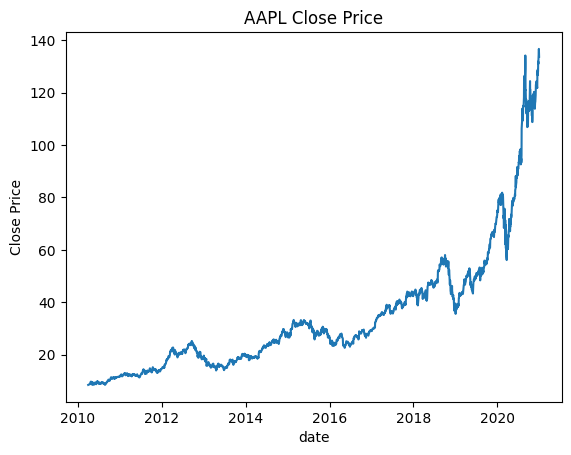

In [ ]:

# Convert the 'Date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Plot the filtered data
plt.plot(df['date'], df['close'])
plt.xlabel('date')
plt.ylabel('Close Price')
plt.title('AAPL Close Price')
plt.show()

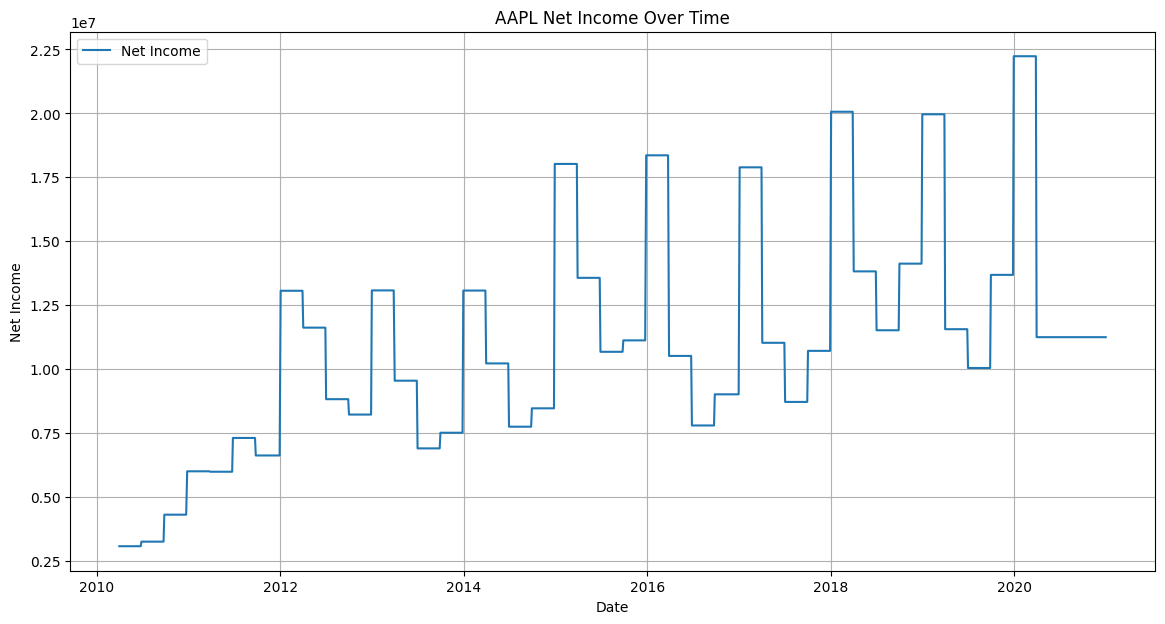

In [ ]:
if 'net_income' in df.columns:
  plt.figure(figsize=(14, 7))
  plt.plot(df['date'], df['net_income'], label='Net Income')
  plt.xlabel('Date')
  plt.ylabel('Net Income')
  plt.title('AAPL Net Income Over Time')
  plt.legend()
  plt.grid(True)
  plt.show()

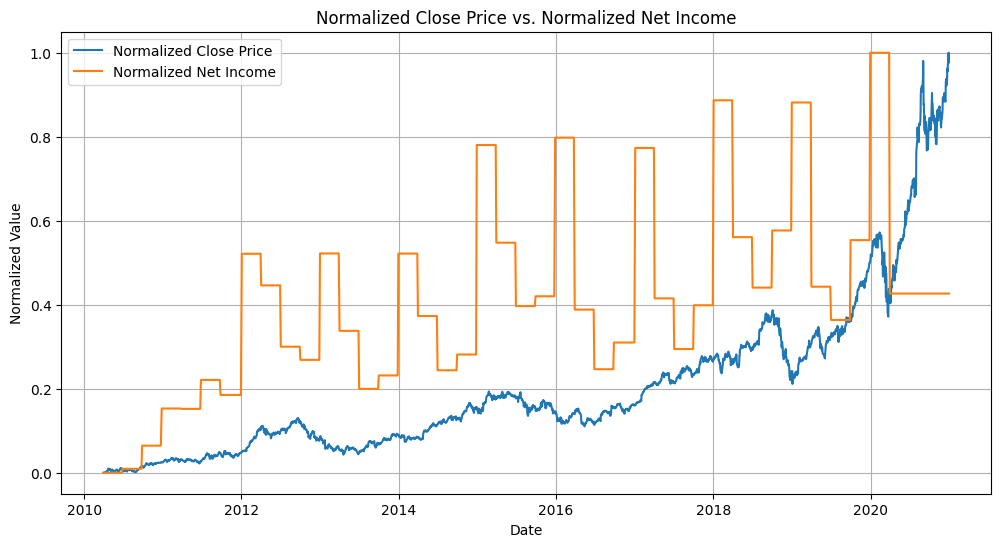

In [ ]:
df['normalized_close'] = (df['close'] - df['close'].min()) / (df['close'].max() - df['close'].min())
df['normalized_net_income'] = (df['net_income'] - df['net_income'].min()) / (df['net_income'].max() - df['net_income'].min())

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['normalized_close'], label='Normalized Close Price')
plt.plot(df['date'], df['normalized_net_income'], label='Normalized Net Income')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Normalized Close Price vs. Normalized Net Income')
plt.legend()
plt.grid(True)
plt.show()

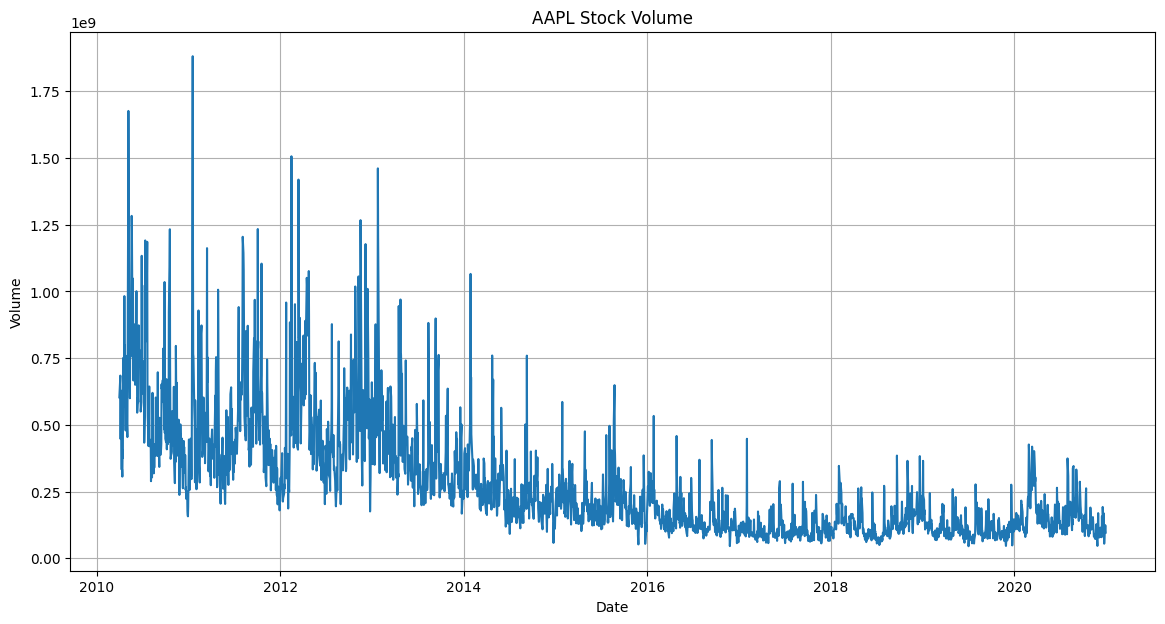

In [ ]:
# Plotting Volume
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('AAPL Stock Volume')
plt.grid(True)
plt.show()

if 'revenue' in df.columns:
  plt.figure(figsize=(14, 7))
  plt.plot(df['date'], df['revenue'], label='Revenue')
  plt.xlabel('Date')
  plt.ylabel('Revenue')
  plt.title('AAPL Revenue Over Time')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
mavgd = 30 # Moving average days

def calculate_moving_average(df, window):
    df[f'{window}_DMA'] = df['close'].rolling(window=window, min_periods=1).mean()
    return df


df = calculate_moving_average(df, mavgd)

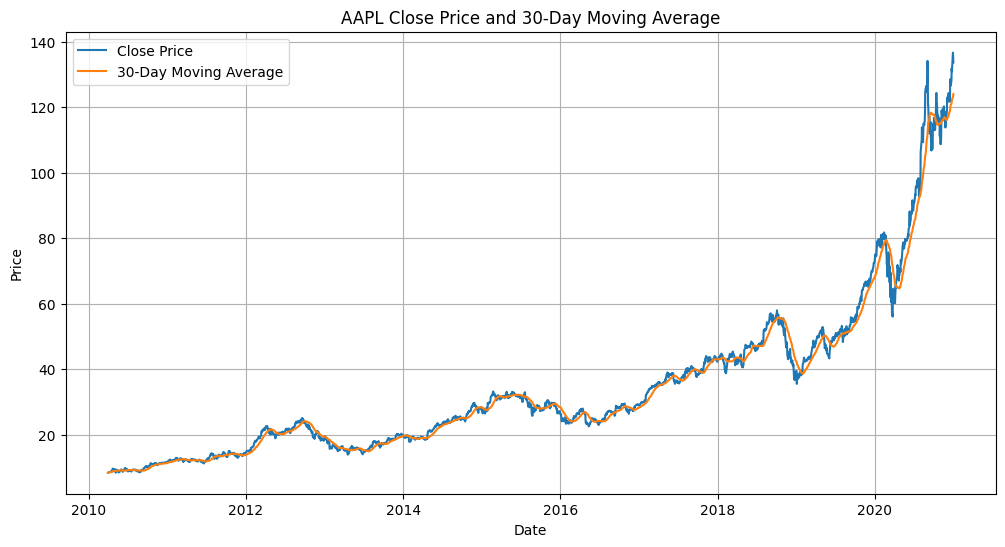

In [ ]:
# Plot the 'close' and '{mavgd}_DMA' columns against the 'date'
plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility
plt.plot(df['date'], df['close'], label='Close Price')
plt.plot(df['date'], df[f'{mavgd}_DMA'], label=f'{mavgd}-Day Moving Average')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'AAPL Close Price and {mavgd}-Day Moving Average')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()

In [ ]:
labels_moving_average_days = 10

# Calculate the {labels_moving_average_days}-day rolling average of the 'Close' price
df[f'{labels_moving_average_days}_Day_Avg'] = df['close'].rolling(window=labels_moving_average_days).mean()

# Shift the {labels_moving_average_days}-day average column down by one position to compare with the next {labels_moving_average_days} average
df[f'Next_{labels_moving_average_days}_Day_Avg'] = df[f'{labels_moving_average_days}_Day_Avg'].shift(-labels_moving_average_days)

# Create the 'Signal' column based on the comparison
df['signal'] = 'SELL'
df.loc[df['close'] < df[f'Next_{labels_moving_average_days}_Day_Avg'], 'signal'] = 'BUY'


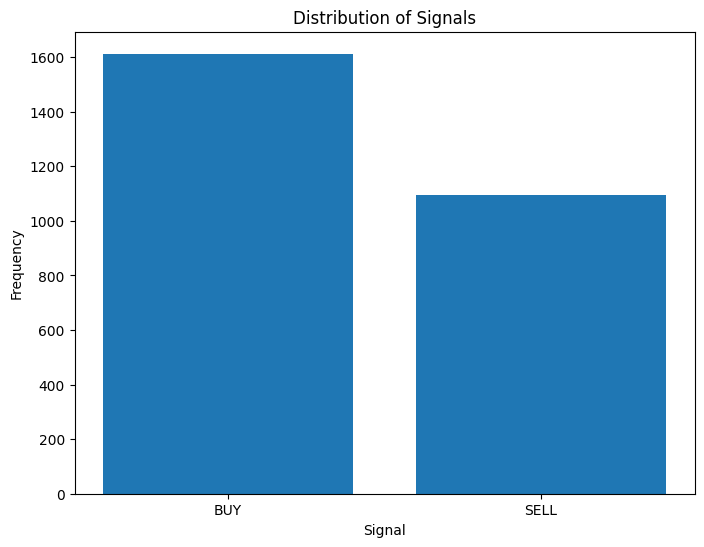

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each signal
signal_counts = df['signal'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(signal_counts.index, signal_counts.values)
plt.xlabel("Signal")
plt.ylabel("Frequency")
plt.title("Distribution of Signals")
plt.show()

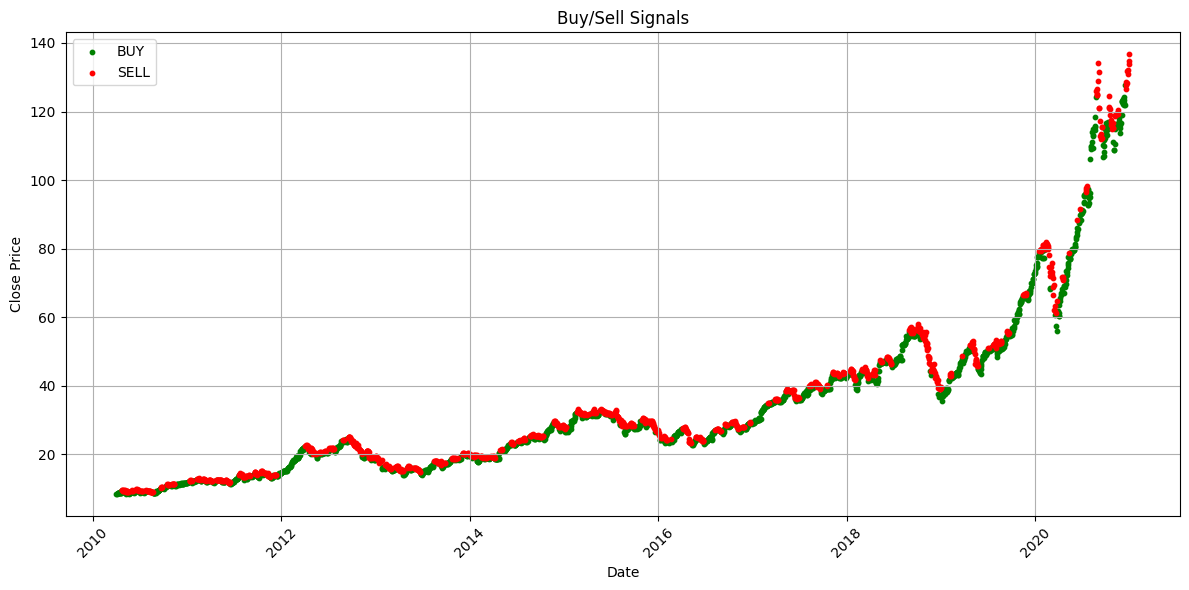

In [ ]:
plt.figure(figsize=(12, 6))

# Plot BUY signals
plt.scatter(df[df['signal'] == 'BUY']['date'], df[df['signal'] == 'BUY']['close'],
            marker='o', color='green', label='BUY', s=10)
# Plot SELL signals
plt.scatter(df[df['signal'] == 'SELL']['date'], df[df['signal'] == 'SELL']['close'],
            marker='o', color='red', label='SELL', s=10)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Buy/Sell Signals')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
import numpy as np

# Initialize variables to track buying and selling
df['stock_quantity'] = 0.0
df['total_buy_price'] = 0.0
df['stock_profit'] = 0.0
quantity = 0.0
buy_price = 0.0

# Iterate through the DataFrame to simulate trading based on signals
for i in range(len(df)):
    if df['signal'][i] == 'BUY':
        # Simulate buying one stock
        quantity += 1
        buy_price += df['close'][i]
        df.loc[i, 'stock_quantity'] = quantity
        df.loc[i, 'total_buy_price'] = buy_price

    elif df['signal'][i] == 'SELL' and quantity > 0:
        # Simulate selling all held stock
        profit = quantity * df['close'][i] - buy_price
        df.loc[i, 'stock_profit'] = profit
        df.loc[i, 'stock_quantity'] = 0  # Reset quantity after selling
        df.loc[i, 'total_buy_price'] = 0  # Reset buy price after selling
        buy_price = 0
        quantity = 0

    else:
        # Hold the stock
        df.loc[i, 'stock_quantity'] = quantity
        df.loc[i, 'total_buy_price'] = buy_price


# Calculate cumulative profit
df['cumulative_profit'] = df['stock_profit'].cumsum()

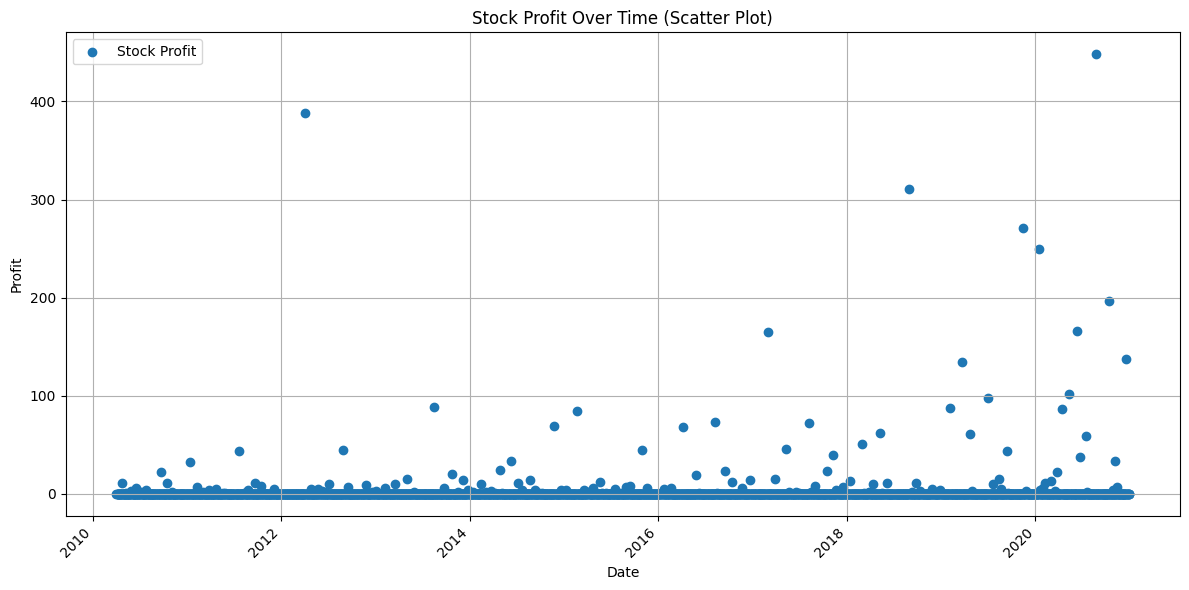

In [ ]:
# Scatter plot of stock profit
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['stock_profit'], label='Stock Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Stock Profit Over Time (Scatter Plot)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

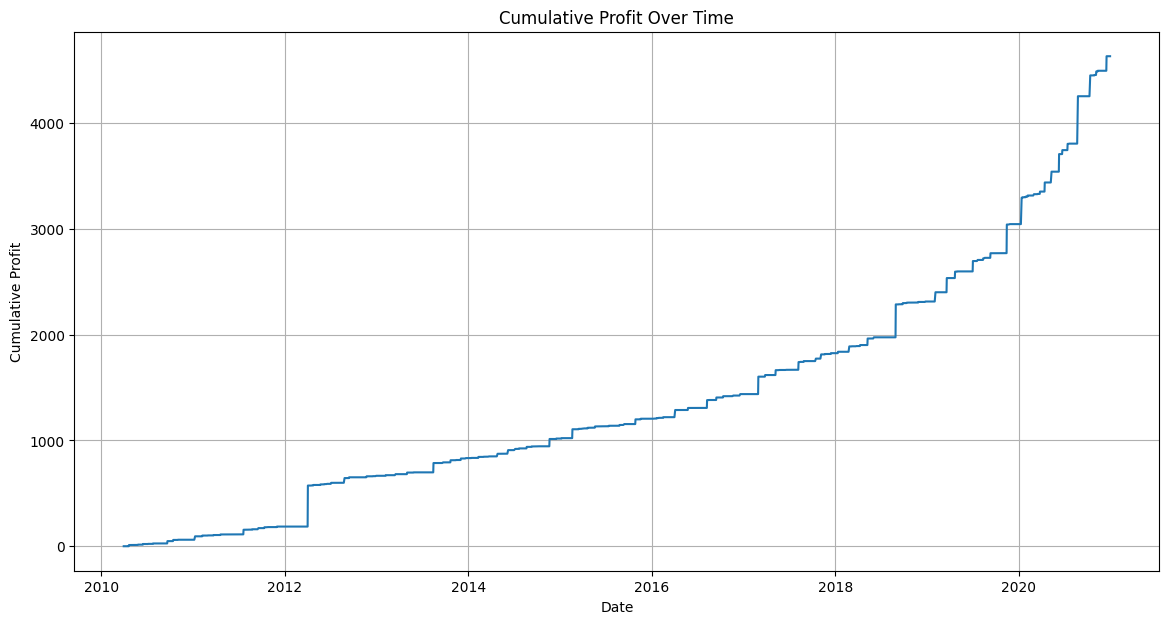

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['cumulative_profit'])
plt.xlabel('Date')
plt.ylabel('Cumulative Profit')
plt.title('Cumulative Profit Over Time')
plt.grid(True)
plt.show()